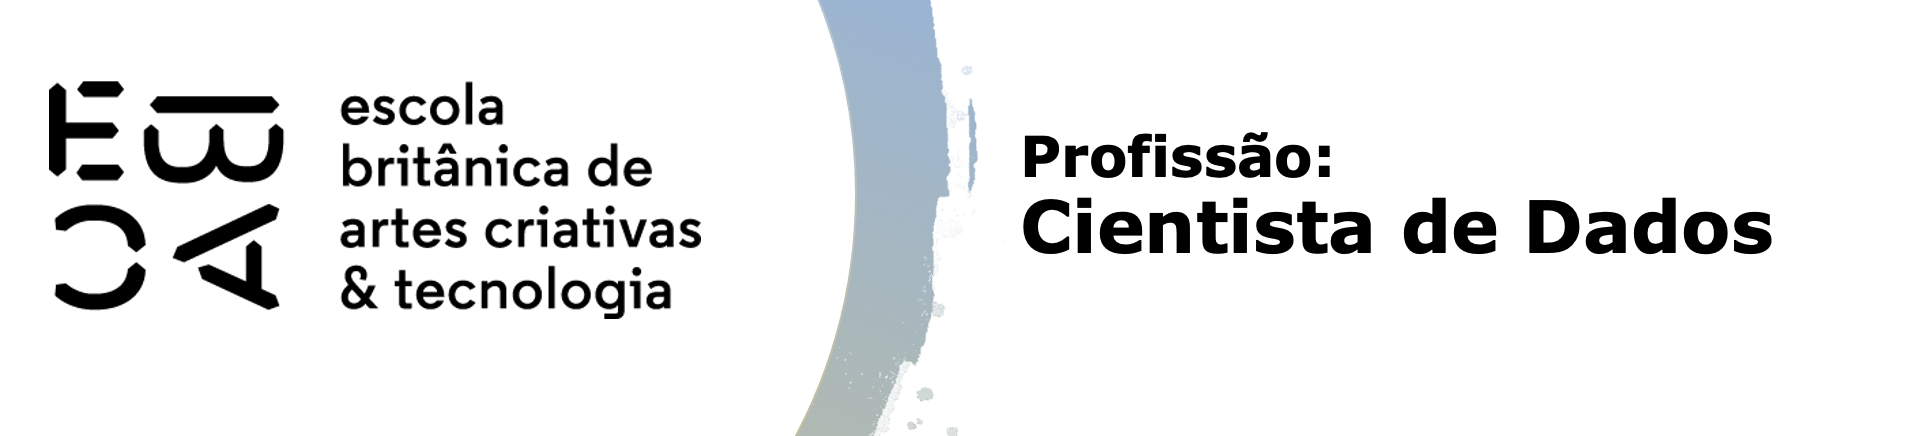

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from sklearn.metrics                import accuracy_score
from sklearn.tree                   import DecisionTreeClassifier
from sklearn.model_selection        import GridSearchCV
from sklearn.model_selection        import cross_val_score
from sklearn.model_selection        import train_test_split
from sklearn.metrics                import confusion_matrix, ConfusionMatrixDisplay,  make_scorer, accuracy_score


In [5]:
X_train = pd.read_csv('X_train_edit.csv', index_col = [0,1])
X_test = pd.read_csv('X_test_edit.csv', index_col = [0,1])
y_train = pd.read_csv('y_train_edit.csv', index_col = [0,1])
y_test = pd.read_csv('y_test_edit.csv', index_col = [0,1])


In [6]:
X_test.head()


,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
,Subject,,,,,,,,,,,,,,,,,,,,,
0,1,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,1,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,1,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,1,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [7]:
X_train.head()

,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
,Subject,,,,,,,,,,,,,,,,,,,,,
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [8]:
y_test.head()


,,0
,Subject,
0,1,5
1,1,5
2,1,5
3,1,5
4,1,5


In [9]:
y_train.head()

,,0
,Subject,
0,1,5
1,1,5
2,1,5
3,1,5
4,1,5


### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [12]:
%%time
X_train_3mv = X_train[['53 tGravityAcc-min()-X','382 fBodyAccJerk-bandsEnergy()-1,8','560 angle(Y,gravityMean)']]
X_test_3mv = X_test[['53 tGravityAcc-min()-X','382 fBodyAccJerk-bandsEnergy()-1,8','560 angle(Y,gravityMean)']]

CPU times: total: 0 ns
Wall time: 3.54 ms


In [11]:
path = DecisionTreeClassifier(random_state=100, min_samples_leaf = 20).cost_complexity_pruning_path(X_train_3mv, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.00000000e+00, 6.59906426e-06, 6.80087051e-06, 8.99098135e-06,
       9.35119695e-06, 9.89217529e-06, 1.08258755e-05, 1.10353748e-05,
       1.75427739e-05, 2.38241675e-05, 3.18341304e-05, 3.69307877e-05,
       4.07553476e-05, 4.18602847e-05, 5.26532445e-05, 5.55018995e-05,
       5.87197700e-05, 6.41224934e-05, 7.20748845e-05, 7.29725943e-05,
       7.34494015e-05, 8.56481444e-05, 8.61634436e-05, 8.84113166e-05,
       8.89002681e-05, 9.39016923e-05, 9.85135044e-05, 9.93339269e-05,
       1.08353426e-04, 1.12003796e-04, 1.12102261e-04, 1.16839113e-04,
       1.22582202e-04, 1.47025120e-04, 1.47143607e-04, 1.50665439e-04,
       1.53540577e-04, 1.74596286e-04, 2.11065827e-04, 2.20689051e-04,
       2.27768134e-04, 2.38088595e-04, 2.49550310e-04, 2.85636561e-04,
       2.88026156e-04, 2.89776222e-04, 2.97189102e-04, 3.50665838e-04,
       3.60123931e-04, 3.62028531e-04, 3.66010486e-04, 4.35255713e-04,
       4.35809630e-04, 4.43756801e-04, 4.45010651e-04, 4.49597283e-04,
      

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [13]:
%%time
clf = DecisionTreeClassifier(random_state=100, min_samples_leaf = 20).fit(X_train_3mv, y_train)

CPU times: total: 15.6 ms
Wall time: 46.6 ms


In [15]:
%%time
grid_parametros = {'ccp_alpha':ccp_alphas[::5]}
grid_parametros

CPU times: total: 0 ns
Wall time: 0 ns


{'ccp_alpha': array([0.00000000e+00, 9.89217529e-06, 3.18341304e-05, 5.55018995e-05,
        7.34494015e-05, 9.39016923e-05, 1.12102261e-04, 1.50665439e-04,
        2.27768134e-04, 2.89776222e-04, 3.66010486e-04, 4.49597283e-04,
        5.50766401e-04, 6.21251573e-04, 8.89427640e-04, 1.06036006e-03,
        1.42753784e-03, 1.62275834e-03, 2.16385984e-03, 4.38907334e-03,
        1.03430703e-02, 1.86138242e-01])}

In [16]:
%%time
grid = GridSearchCV(estimator = clf, param_grid=grid_parametros,cv=10)
grid.fit(X_train_3mv, y_train)

CPU times: total: 3.53 s
Wall time: 7.79 s


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(min_samples_leaf=20,
                                              random_state=100),
             param_grid={'ccp_alpha': array([0.00000000e+00, 9.89217529e-06, 3.18341304e-05, 5.55018995e-05,
       7.34494015e-05, 9.39016923e-05, 1.12102261e-04, 1.50665439e-04,
       2.27768134e-04, 2.89776222e-04, 3.66010486e-04, 4.49597283e-04,
       5.50766401e-04, 6.21251573e-04, 8.89427640e-04, 1.06036006e-03,
       1.42753784e-03, 1.62275834e-03, 2.16385984e-03, 4.38907334e-03,
       1.03430703e-02, 1.86138242e-01])})

In [17]:
%%time
results = pd.DataFrame(grid.cv_results_)
results.head()

CPU times: total: 0 ns
Wall time: 2.22 ms


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.052402,0.007328,0.014673,0.006602,0.0,{'ccp_alpha': 0.0},0.739130,0.797554,0.808163,0.727891,0.783673,0.717007,0.764626,0.697959,0.854422,0.790476,0.768090,0.045459,18
1,0.047092,0.014652,0.009923,0.004637,0.00001,{'ccp_alpha': 9.892175289345545e-06},0.739130,0.797554,0.808163,0.727891,0.783673,0.717007,0.764626,0.697959,0.854422,0.790476,0.768090,0.045459,18
2,0.037588,0.006976,0.007181,0.001532,0.000032,{'ccp_alpha': 3.183413042732075e-05},0.739130,0.797554,0.808163,0.727891,0.783673,0.717007,0.764626,0.697959,0.854422,0.790476,0.768090,0.045459,18
3,0.024922,0.001322,0.004932,0.001982,0.000056,{'ccp_alpha': 5.550189952419353e-05},0.748641,0.797554,0.808163,0.727891,0.783673,0.717007,0.764626,0.697959,0.854422,0.790476,0.769041,0.044940,12
4,0.027527,0.002831,0.005546,0.001483,0.000073,{'ccp_alpha': 7.344940152339511e-05},0.748641,0.797554,0.808163,0.727891,0.783673,0.717007,0.764626,0.697959,0.854422,0.790476,0.769041,0.044940,12


In [18]:
grid.best_score_

0.8023593241644484

In [20]:
melhor_ccp = results.iloc[grid.best_index_,4]
melhor_ccp

0.004389073344928773

### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [21]:
%%time
clf_1 = DecisionTreeClassifier(random_state=100, ccp_alpha=melhor_ccp).fit(X_train_3mv, y_train)

CPU times: total: 15.6 ms
Wall time: 40.4 ms


In [22]:
%%time
#Cálculo da acurácia da árvore na base de testes
clf_1.score(X_test_3mv, y_test)

CPU times: total: 0 ns
Wall time: 8.8 ms


0.7376993552765524

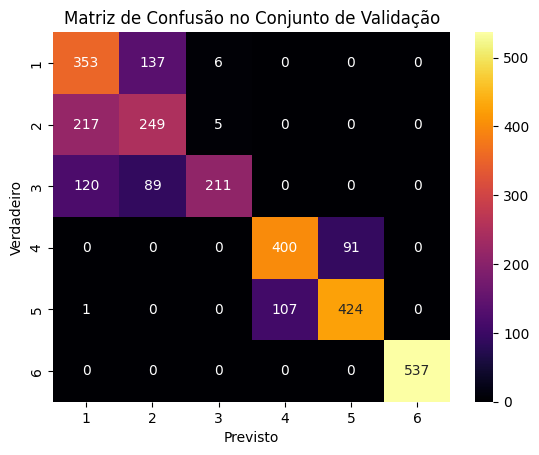

In [30]:
# Realizando a predição na base de teste
y_pred_test = clf_1.predict(X_test_3mv)

# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred_test)

# Criando um heatmap com seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap="inferno", xticklabels=clf_1.classes_, yticklabels=clf_1.classes_)

# Adicionando rótulos e exibindo o gráfico
plt.title("Matriz de Confusão no Conjunto de Validação")
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.show()

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [31]:
y_train_dummies = pd.get_dummies(y_train['0'])
y_train_5 = y_train_dummies[2].to_frame()
y_train_5.head()

,,2
,Subject,
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [32]:
clf_2 = DecisionTreeClassifier(random_state=42, min_samples_leaf=20, max_depth=4).fit(X_train, y_train_5)

In [35]:
var_importance = pd.Series(clf_2.feature_importances_, index=X_train.columns)
var_importance.sort_values(ascending = False, inplace=True)
var_importance.head(3)

74 tGravityAcc-arCoeff()-Z,1      0.336087
331 fBodyAcc-bandsEnergy()-1,8    0.308642
427 fBodyGyro-std()-X             0.066982
dtype: float64

In [36]:
X_train_mv = X_train[['74 tGravityAcc-arCoeff()-Z,1','331 fBodyAcc-bandsEnergy()-1,8','440 fBodyGyro-energy()-X']]
X_test_mv = X_test[['74 tGravityAcc-arCoeff()-Z,1','331 fBodyAcc-bandsEnergy()-1,8','440 fBodyGyro-energy()-X']]

In [37]:
path = DecisionTreeClassifier(random_state=100, min_samples_leaf = 20).cost_complexity_pruning_path(X_train_mv, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.00000000e+00, 6.26536890e-06, 7.68794058e-06, 8.26772494e-06,
       9.97344437e-06, 1.62755875e-05, 2.07470146e-05, 2.85462788e-05,
       3.05715322e-05, 3.24166929e-05, 3.74826031e-05, 4.02752851e-05,
       4.34459928e-05, 4.62738549e-05, 4.84884134e-05, 5.09274489e-05,
       5.11378301e-05, 5.88072250e-05, 6.12078346e-05, 6.22971515e-05,
       6.65955372e-05, 6.85854055e-05, 6.95695110e-05, 7.19893734e-05,
       7.21725034e-05, 7.25584164e-05, 7.31946532e-05, 7.84100365e-05,
       7.88129249e-05, 7.93059746e-05, 8.08880966e-05, 8.10854901e-05,
       8.21992661e-05, 8.53544794e-05, 8.78297929e-05, 8.84113166e-05,
       8.84113166e-05, 8.91384798e-05, 9.04427455e-05, 9.47032840e-05,
       9.79109453e-05, 9.89670749e-05, 9.99969893e-05, 1.02811645e-04,
       1.05553741e-04, 1.05680132e-04, 1.06544679e-04, 1.12362208e-04,
       1.13288960e-04, 1.21944613e-04, 1.22595984e-04, 1.30608850e-04,
       1.31250988e-04, 1.35276796e-04, 1.39401069e-04, 1.40508874e-04,
      

In [38]:
clf_3 = DecisionTreeClassifier(random_state=42, min_samples_leaf= 20).fit(X_train_mv, y_train)

In [40]:
grid_params = {'ccp_alpha':ccp_alphas[::5]}
grid_params

{'ccp_alpha': array([0.00000000e+00, 1.62755875e-05, 3.74826031e-05, 5.09274489e-05,
        6.65955372e-05, 7.25584164e-05, 8.08880966e-05, 8.84113166e-05,
        9.79109453e-05, 1.05680132e-04, 1.22595984e-04, 1.40508874e-04,
        1.49619151e-04, 1.58197632e-04, 1.64487874e-04, 1.66769461e-04,
        1.80614059e-04, 1.93388893e-04, 2.01836332e-04, 2.25247000e-04,
        2.37164483e-04, 2.47832804e-04, 2.62166891e-04, 2.81973821e-04,
        2.95384881e-04, 3.22370026e-04, 3.35446980e-04, 3.51825864e-04,
        3.81021971e-04, 4.12807753e-04, 4.40802897e-04, 4.68711990e-04,
        5.64016987e-04, 6.55804069e-04, 7.30446294e-04, 7.83993280e-04,
        9.00399367e-04, 1.11381666e-03, 1.46487641e-03, 2.47465690e-03,
        3.58993200e-03, 1.15097969e-02])}

In [41]:
grid = GridSearchCV(estimator=clf_3, param_grid=grid_params, cv = 10)
grid.fit(X_train_mv, y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(min_samples_leaf=20,
                                              random_state=42),
             param_grid={'ccp_alpha': array([0.00000000e+00, 1.62755875e-05, 3.74826031e-05, 5.09274489e-05,
       6.65955372e-05, 7.25584164e-05, 8.08880966e-05, 8.84113166e-05,
       9.79109453e-05, 1.05680132e-04, 1.22595984e-04, 1.40508874e-04,
       1.49619151e-04, 1.58197632e-04, 1.64487874e-04, 1.667...
       1.80614059e-04, 1.93388893e-04, 2.01836332e-04, 2.25247000e-04,
       2.37164483e-04, 2.47832804e-04, 2.62166891e-04, 2.81973821e-04,
       2.95384881e-04, 3.22370026e-04, 3.35446980e-04, 3.51825864e-04,
       3.81021971e-04, 4.12807753e-04, 4.40802897e-04, 4.68711990e-04,
       5.64016987e-04, 6.55804069e-04, 7.30446294e-04, 7.83993280e-04,
       9.00399367e-04, 1.11381666e-03, 1.46487641e-03, 2.47465690e-03,
       3.58993200e-03, 1.15097969e-02])})

In [43]:
results_2 = pd.DataFrame(grid.cv_results_)
results_2.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.035678,0.010352,0.005272,0.000892,0.0,{'ccp_alpha': 0.0},0.557065,0.445652,0.514286,0.522449,0.52517,0.495238,0.572789,0.623129,0.598639,0.610884,0.546530,0.053299,29
1,0.029051,0.002546,0.004227,0.000768,0.000016,{'ccp_alpha': 1.6275587548709937e-05},0.557065,0.445652,0.514286,0.522449,0.52517,0.495238,0.572789,0.623129,0.598639,0.610884,0.546530,0.053299,29
2,0.027467,0.002464,0.003673,0.000689,0.000037,{'ccp_alpha': 3.748260312197308e-05},0.557065,0.445652,0.514286,0.521088,0.52517,0.495238,0.572789,0.623129,0.598639,0.610884,0.546394,0.053362,32
3,0.029293,0.001204,0.004005,0.000523,0.000051,{'ccp_alpha': 5.092744894602281e-05},0.557065,0.445652,0.514286,0.521088,0.52517,0.495238,0.572789,0.623129,0.598639,0.610884,0.546394,0.053362,32
4,0.027585,0.001734,0.004372,0.001264,0.000067,{'ccp_alpha': 6.65955372157771e-05},0.557065,0.444293,0.512925,0.521088,0.52517,0.492517,0.572789,0.621769,0.597279,0.610884,0.545578,0.053639,38


In [47]:
melhor_ccp2 = results_2.iloc[grid.best_index_,4]
print(f'Melhor valor de ccp: {round(melhor_ccp2,5) }')  # Melhor valor de CCP

Melhor valor de ccp: 0.00247


In [48]:
clf_4 = DecisionTreeClassifier(random_state=54, ccp_alpha=melhor_ccp2).fit(X_train_mv, y_train)
clf_4.score(X_test_mv,y_test)

0.5839837122497455

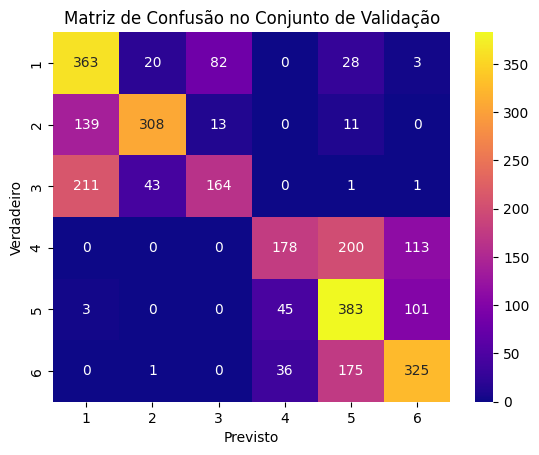

In [49]:
# Realizando a predição na base de teste
y_pred_test = clf_4.predict(X_test_mv)

# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred_test)

# Criando um heatmap com seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap="plasma", xticklabels=clf_4.classes_, yticklabels=clf_4.classes_)

# Adicionando rótulos e exibindo o gráfico
plt.title("Matriz de Confusão no Conjunto de Validação")
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.show()

* Acurácia anterior apenas da classe 2: 249/(217+249+5) = 52,87%

A precisão anterior para a classe 2 indica a porcentagem de instâncias da classe 2 corretamente classificadas em relação ao total de instâncias dessa classe. Embora seja um indicador relevante, a acurácia não leva em consideração o desbalanceamento do conjunto de dados.

* Acurácia depois apenas da classe 2: 308/(139+308+13+11) = 65,39%

A acurácia atual para a classe 2 representa uma melhora significativa. Isso sugere que o modelo atual está mais focado e preciso na classificação da classe 2. Essa métrica pode ser mais relevante se a classe 2 for de interesse especial no contexto do problema.
Análise global:

* Apesar de o modelo anterior ter uma acurácia geral maior, é importante destacar que a relevância de uma classe específica pode variar. Em muitos casos, otimizar o desempenho para a classe de maior interesse é mais crucial do que alcançar uma alta acurácia geral.
Considerações adicionais:

Recomenda-se explorar outras métricas, como precision, recall, F1-score ou a matriz de confusão, para obter uma compreensão mais completa do desempenho do modelo em diferentes aspectos. Isso é especialmente relevante quando as classes estão desbalanceadas.